# Exploring High Weight Genes

Visualizing the distribution of high weight genes across different dimensionality reduction algorithms, including `PCA`, `ICA`, `NMF`, `ADAGE`, and `Tybalt`. The standard procedure for defining high weight genes is defined by greater than 2.5 standard deviations away from the mean, separately for both positive and negative tails.

The module **`high_weight_genes`** facilitates high weight gene discovery using different metrics defined at custom thresholds.

## Interpretation

Methods like `ICA` and `ADAGE` learn features that have more even tailed distributions and are less skewed than methods like `PCA`, `NMF`, and `Tybalt`. Defining high weight genes using `NMF` can only be done using positive tails, whereas `ADAGE` and `ICA` learn different representations in each tail. The neural network based approaches `ADAGE` and `Tybalt` (and other `VAE` variants), and to a lesser extent `ICA`, learn different types of distributions in each node. The distributions they learn have different skew and kurtosis. **These observations necesitate a dynamic procedure of assigning genes to nodes.**

In the following notebook we explore the distributions of high weight genes across features learned by the aformentioned algorithms.

### 1) High weight positive and negative genes defined by standard protocol

First, we visualize the distribution of high weight genes for positive and negative tails within a single node for each algorithm. We determine that some methods (`ADAGE`) have largely symmetrical nodes, while others (`Tybalt` and `VAE` variants) have some nodes with many genes isolated in only one of the tails. 

### 2) Diversity of individual node distributions

Next, we plot the full distribution of the first 25 features (of 100) defined for each algorithm. From this analysis it is clear the features for each algorithm learn quite different distributions. `ADAGE` learn gene weights near zero with light tails, `NMF` learn only positive weights, and `VAE` variants, `PCA`, and `ICA` learn heterogeneous feature distributions.

### 3) Skewness and Kurtosis

We observe the distribution of skewness and kurtosis for each feature across algorithms. This analysis will give us a clearer picture on feature heterogeneity and how defining high weight genes across algorithms may be artificially penalized by standard methods. We observe increased node distribution heterogeneity for `VAE` variants, `NMF`, but less heterogeneity for `PCA`, `ICA`, and `ADAGE` features.

### 4) Node Type Designations

Lastly, we determine that a dynamic procedure for assigning high weight genes to nodes may be helpful in assigning biological patterns to learned features. We define node types as:

- **Type A:** Low skewness, low kurtosis
  - These are the nodes closest to normal distributions
  - More stringent cutoffs required to eliminate false postive genes (use ` > 3 standard deviations`)
- **Type B:** Low skewness, high kurtosis
  - Symmetrical distributions but many genes at the end of tails.
  - Use the standard procedure for defining high weight genes (`> 2.5 standard deviations`)
- **Type C:** High skewness, low kurtosis
  - Heavily biased toward postive high weight or negative high weight genes, but few activated genes
  - Type C nodes can be split into two types `Type C Pos` and `Type C Neg`, designated based on if they include more positive high weight genes or negative high weight genes.
  - Use standard procedure for defining high weight in long tails, but strict procedure for defining opposite tail.
- **Type D:** High skewness, high kurtosis
  - Heavily biased toward one tail, with many activated genes
  - Type D nodes can also be split into two types depending on direction of the high weight tail
  - Use the opposite high weight gene procedure however to reduce false positive but still capture some signal in the opposite high weight tail.
  
We apply the correction and visualize the adjusted distributions. A pathway coverage analysis will determine if these adjustments improve pathway discovery.

In [1]:
import os
import numpy as np
import pandas as pd
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

from tybalt.genes import high_weight_genes

In [2]:
%matplotlib inline
plt.style.use('seaborn-notebook')

In [3]:
sns.set(style='white', color_codes=True)
sns.set_context('paper', rc={'font.size':14, 'axes.titlesize':20, 'axes.labelsize':16})   

In [4]:
# High weight gene metrics
metric = 'stddev'
threshold = 2.5

# Color dictionary
algorithm_color_dict = {'PCA': '#a6cee3',
                        'ICA': '#1f78b4',
                        'NMF': '#b2df8a',
                        'ADAGE': '#33a02c',
                        'Tybalt': '#fb9a99',
                        'VAE_100': '#e31a1c',
                        'VAE_300': '#fdbf6f'}

In [5]:
# Feature file locations
pca_file = '../pancan_viz/data/pca_feature_rnaseq.tsv.gz'
ica_file = '../pancan_viz/data/ica_feature_rnaseq.tsv.gz'
nmf_file = '../pancan_viz/data/nmf_feature_rnaseq.tsv.gz'
adage_file = 'https://github.com/greenelab/tybalt/raw/4bb7c5c5eb6b9dfe843269f8c3059e1168542b55/results/adage_gene_weights.tsv'
tybalt_file = 'https://github.com/greenelab/tybalt/raw/928804ffd3bb3f9d5559796b2221500c303ed92c/results/tybalt_gene_weights.tsv'
vae_2l100_file = 'https://github.com/greenelab/tybalt/raw/7d2854172b57efc4b92ca80d3ec86dfbbc3e4325/data/tybalt_gene_weights_twohidden100.tsv'
vae_2l300_file = 'https://github.com/greenelab/tybalt/raw/7d2854172b57efc4b92ca80d3ec86dfbbc3e4325/data/tybalt_gene_weights_twohidden300.tsv'

In [6]:
# Instantiate high weight gene objects
pca_weights = high_weight_genes(pca_file, metric=metric, thresh=threshold, algorithm='PCA')
ica_weights = high_weight_genes(ica_file, metric=metric, thresh=threshold, algorithm='ICA')
nmf_weights = high_weight_genes(nmf_file, metric=metric, thresh=threshold, algorithm='NMF')
adage_weights = high_weight_genes(adage_file, metric=metric, thresh=threshold, algorithm='ADAGE')
tybalt_weights = high_weight_genes(tybalt_file, metric=metric, thresh=threshold, algorithm='Tybalt')
vae_2l100_weights = high_weight_genes(vae_2l100_file, metric=metric, thresh=threshold, algorithm='VAE_100')
vae_2l300_weights = high_weight_genes(vae_2l300_file, metric=metric, thresh=threshold, algorithm='VAE_300')

## Visualize distributions

Certain `high_weight_genes` methods enable quick visualizations of high weigh gene features. Here, we show:

1. Positive and negative tail number of high weight genes
2. Full gene activity distributions

We use the `standard method` of extracting high weight genes as presented in [Tan et al. 2017](https://doi.org/10.1016/j.cels.2017.06.003). Briefly, this method calculates the standard deviation of the gene weight distribution and then selects high weight genes based on a cutoff: `abs(weight) > 2.5 stddev`

### Positive/negative tails

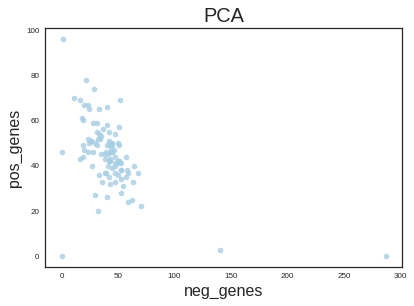

In [7]:
pca_weights.count_high_weight_genes(return_plot=True, title='PCA',
                                    color=algorithm_color_dict['PCA']);

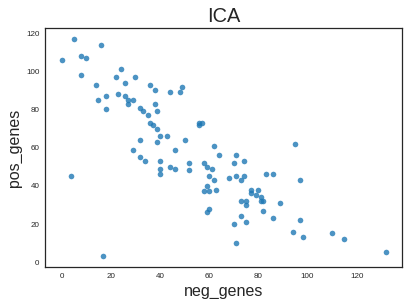

In [8]:
ica_weights.count_high_weight_genes(return_plot=True, title='ICA',
                                    color=algorithm_color_dict['ICA']);

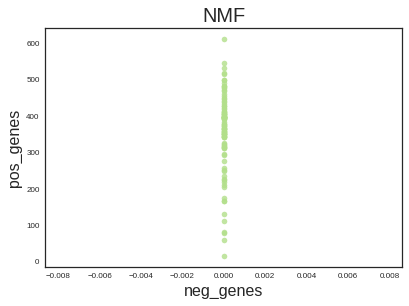

In [9]:
nmf_weights.count_high_weight_genes(return_plot=True, title='NMF',
                                    color=algorithm_color_dict['NMF']);

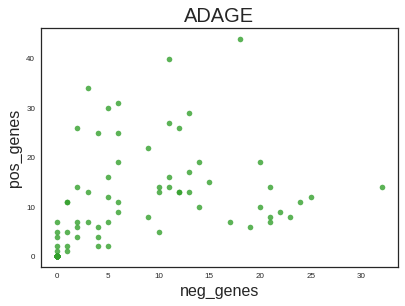

In [10]:
adage_weights.count_high_weight_genes(return_plot=True, title='ADAGE',
                                      color=algorithm_color_dict['ADAGE']);

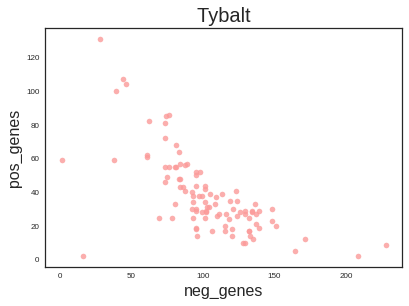

In [11]:
tybalt_weights.count_high_weight_genes(return_plot=True, title='Tybalt',
                                       color=algorithm_color_dict['Tybalt']);

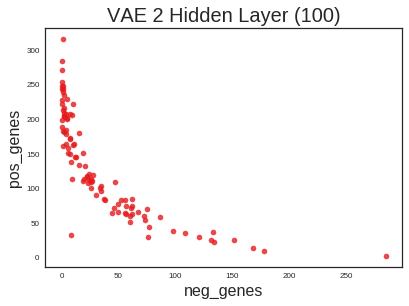

In [12]:
vae_2l100_weights.count_high_weight_genes(return_plot=True,
                                          title='VAE 2 Hidden Layer (100)',
                                          color=algorithm_color_dict['VAE_100']);

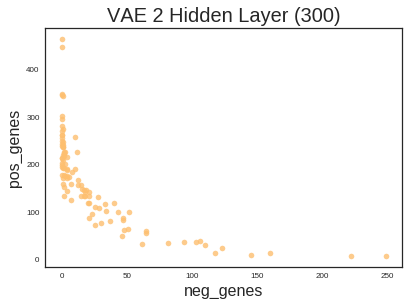

In [13]:
vae_2l300_weights.count_high_weight_genes(return_plot=True,
                                          title='VAE 2 Hidden Layer (300)',
                                          color=algorithm_color_dict['VAE_300']);

### Full gene activity distributions

Plot the gene activity distributions of the first 10 features for each algorithm

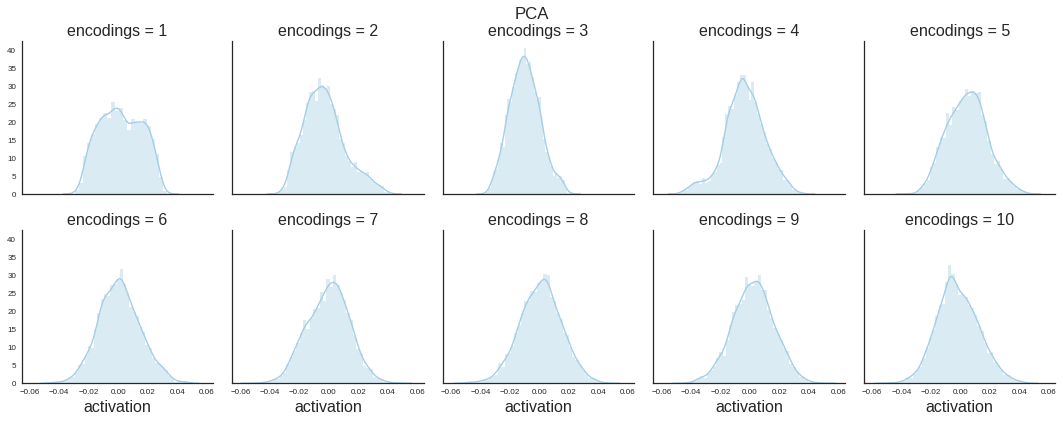

In [14]:
first_encodings = range(1, 11)
pca_weights.plot_weight_dist(features=first_encodings, title='PCA',
                             color=algorithm_color_dict['PCA']);

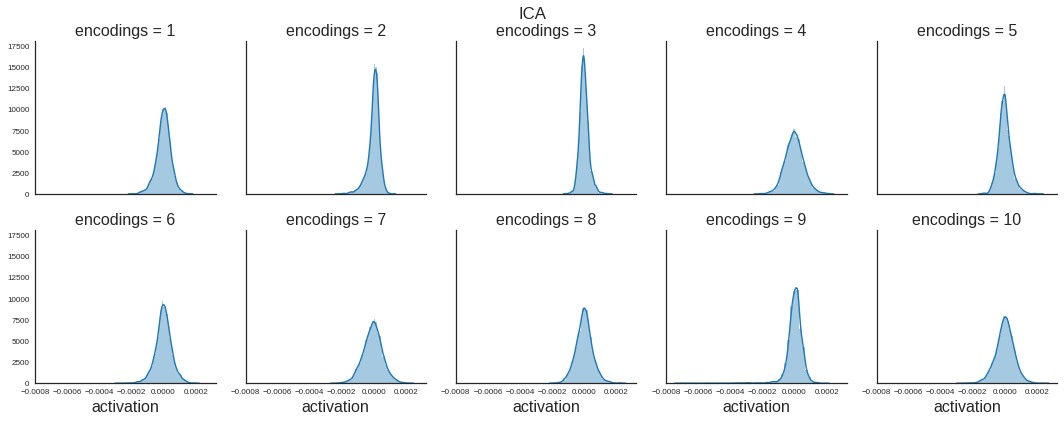

In [15]:
ica_weights.plot_weight_dist(features=first_encodings, title='ICA',
                             color=algorithm_color_dict['ICA']);

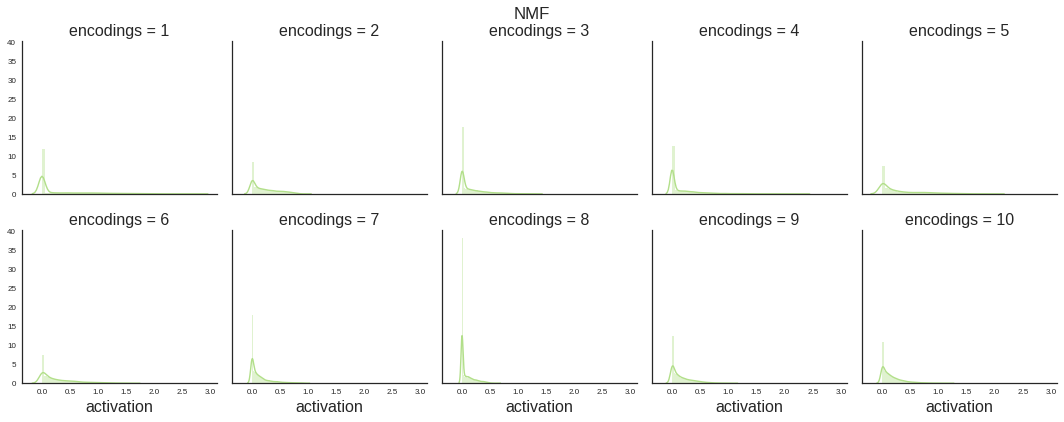

In [16]:
nmf_weights.plot_weight_dist(features=first_encodings, title='NMF',
                             color=algorithm_color_dict['NMF']);

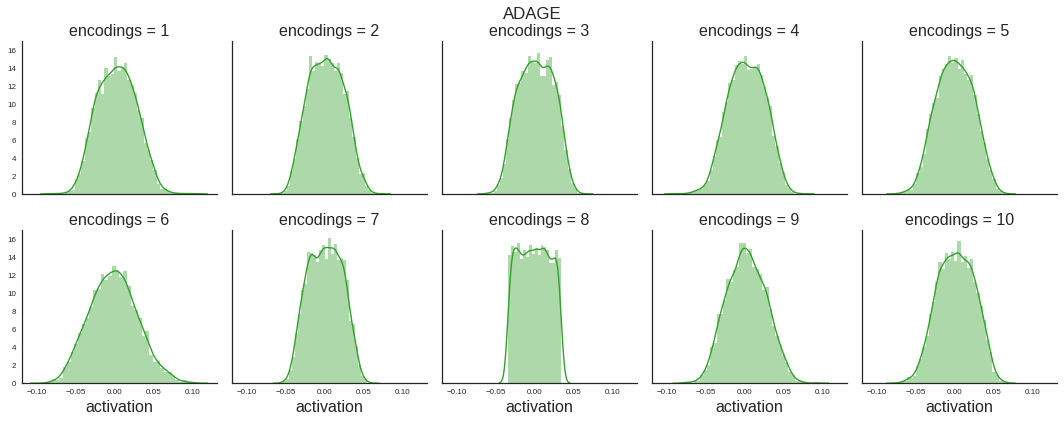

In [17]:
adage_weights.plot_weight_dist(features=first_encodings, title='ADAGE',
                               color=algorithm_color_dict['ADAGE']);

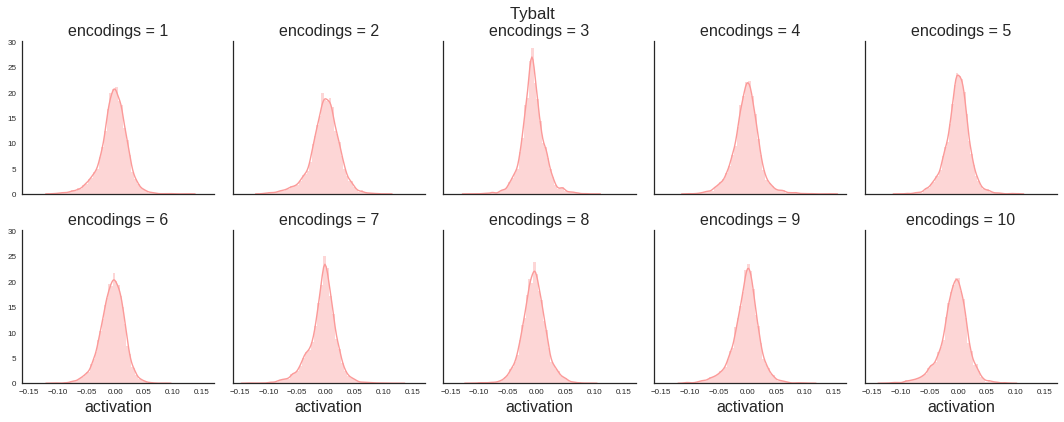

In [18]:
tybalt_weights.plot_weight_dist(features=first_encodings, title='Tybalt',
                                color=algorithm_color_dict['Tybalt']);

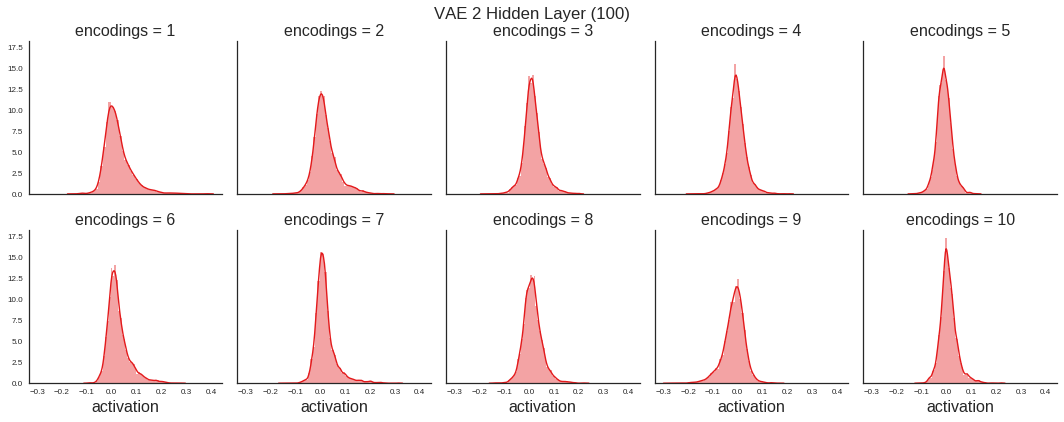

In [19]:
vae_2l100_weights.plot_weight_dist(features=first_encodings,
                                   title='VAE 2 Hidden Layer (100)',
                                   color=algorithm_color_dict['VAE_100']);

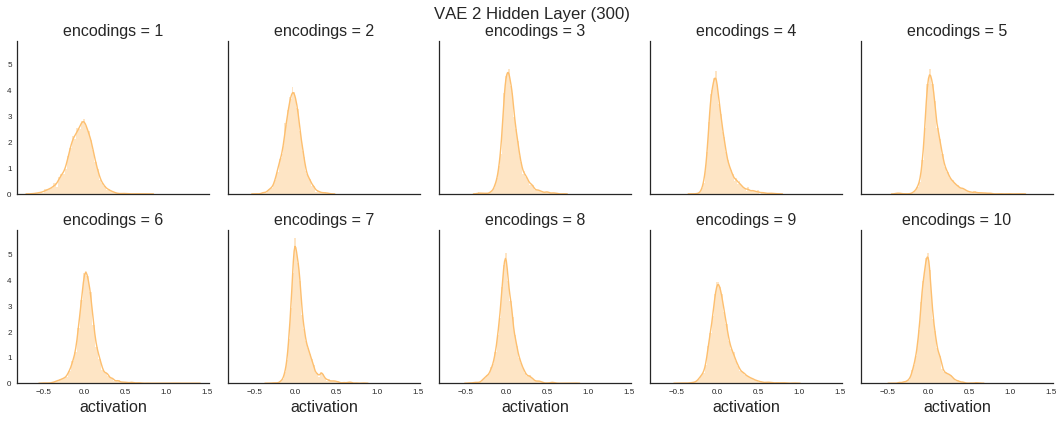

In [20]:
vae_2l300_weights.plot_weight_dist(features=first_encodings,
                                   title='VAE 2 Hidden Layer (300)',
                                   color=algorithm_color_dict['VAE_300']);

## Observe distribution of skewness and kurtosis

* Skewness - measure of distribution symmetry (normal distribution = 0)
* Kurtosis - measure of tail density (light tail is < 0, heavy tail is > 0)

We also remove outliers in this visualization to focus on the areas of highest densities. The outliers are defined based on calculating z-scores for `skew` and `kurtosis` and discarding the feature if it is `> 3z` for either. We output the nodes of interest with their corresponding values. The distributions of the samples over these features can be explored in our [Shiny App](https://gregway.shinyapps.io/pancan_plotter/). 

        skew  kurtosis
40  0.744141  2.773984
47  0.733348  7.516894


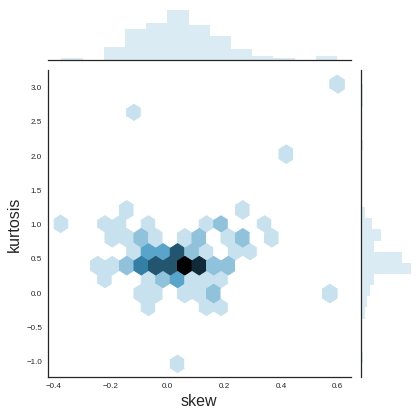

In [21]:
pca_node_categories = pca_weights.get_node_categories(melted=True)
ax, pca_outlier = pca_weights.plot_skewkurtosis(color=algorithm_color_dict['PCA'])
print(pca_outlier)

         skew    kurtosis
9   -4.323351   42.340650
30   4.778691   35.188953
48 -10.271499  198.120854


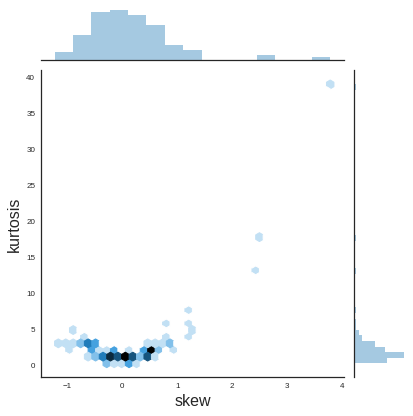

In [22]:
ica_node_categories = ica_weights.get_node_categories(melted=True)
ax, ica_outlier = ica_weights.plot_skewkurtosis(color=algorithm_color_dict['ICA'])
print(ica_outlier)

         skew    kurtosis
23  18.787895  364.941601
30  10.428646  152.296701
65  12.611232  190.281358
94  10.293789  138.993949


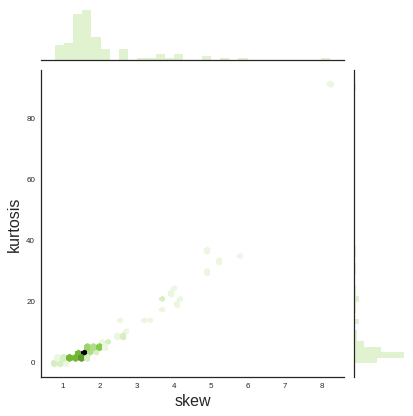

In [23]:
nmf_node_categories = nmf_weights.get_node_categories(melted=True)
ax, nmf_outlier = nmf_weights.plot_skewkurtosis(color=algorithm_color_dict['NMF'])
print(nmf_outlier)

        skew  kurtosis
40 -0.171257 -0.266821


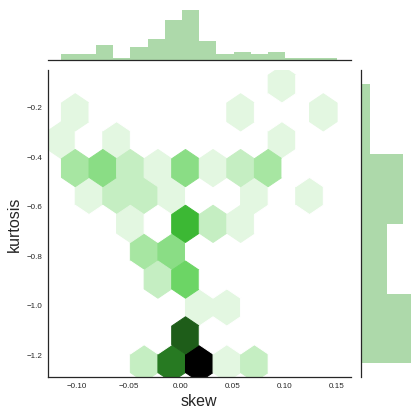

In [24]:
adage_node_categories = adage_weights.get_node_categories(melted=True)
ax, adage_outlier = adage_weights.plot_skewkurtosis(color=algorithm_color_dict['ADAGE'])
print(adage_outlier)

         skew    kurtosis
27   7.612266   97.817415
82 -13.807998  252.191409


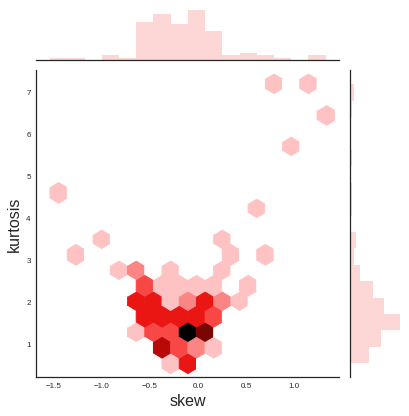

In [25]:
tybalt_node_categories = tybalt_weights.get_node_categories(melted=True)
ax, tybalt_outlier = tybalt_weights.plot_skewkurtosis(color=algorithm_color_dict['Tybalt'])
print(tybalt_outlier)

        skew    kurtosis
61  7.216001  100.723603


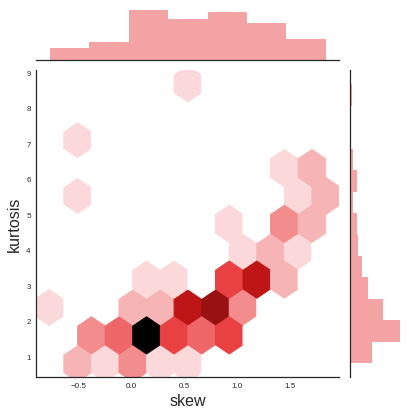

In [26]:
vae_2l100_node_categories = vae_2l100_weights.get_node_categories(melted=True)
ax, vae_2l100_outlier = vae_2l100_weights.plot_skewkurtosis(color=algorithm_color_dict['VAE_100'])
print(vae_2l100_outlier)

        skew   kurtosis
28  2.130059   9.690159
82 -0.196400  11.909457


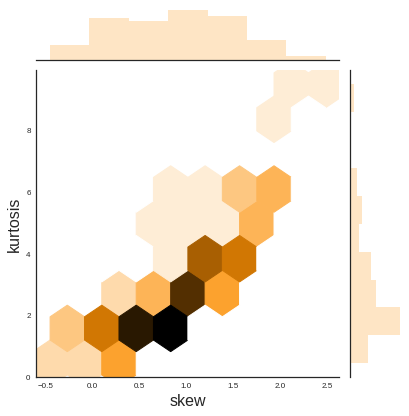

In [27]:
vae_2l300_node_categories = vae_2l300_weights.get_node_categories(melted=True)
ax, vae_2l300_outlier = vae_2l300_weights.plot_skewkurtosis(color=algorithm_color_dict['VAE_300'])
print(vae_2l300_outlier)

## Define Node Categories based on Feature Activation Distributions

|      |        | Skew   | |
| :--: | :----: | :----: | :--: |
| **Kurtosis** | | _Low_    | _High_ |
|      | _Low_ | Type A | Type C |
|      | _High_ | Type B | Type D |

We also define subsets of Type C and Type D nodes because the skew could be positive (left tail) or negative (right tail).

High Skewness and Kurtosis determined statistically significantly different than normal using `scipy.stats.skewtest` and `scipy.stats.kurtosistest` with a Bonferroni adjusted p value.

### Visualize the distribution of each of these node types across agorithms.

In [28]:
# Concatenate and visualize node categories
node_categories = pd.concat([
        pca_node_categories,
        ica_node_categories,
        nmf_node_categories,
        adage_node_categories,
        tybalt_node_categories,
        vae_2l100_node_categories,
        vae_2l300_node_categories])
node_categories.head(2)

,node_type,count,algorithm
0,type_a,0,PCA
1,type_a,0,PCA


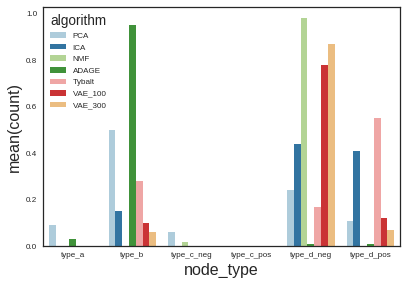

In [29]:
g = sns.barplot('node_type', y="count", hue='algorithm', palette=algorithm_color_dict,
                ci=None, data=node_categories)

### Adjust for node type distributions and reassign high weights

The adjustments are made based on `skewness` and `kurtosis` observations for each node. Specially, each node is assigned a `type` and the high weight gene cutoff is modified based on the node type.

- **`Type A`** nodes have low `skew` and `kurtosis`.
  - This means gene features are symmetrical and include few genes in tails.
  - Increase the threshold by `0.5` to remove false positive genes from selection.
- **`Type B`** nodes have low `skew` and high `kurtosis`.
  - This means gene features are symmetrical and include many genes in tails.
  - This is the standard distribution designed for the given input threshold.
- **`Type C`** nodes have high `skew` and low `kurtosis`.
  - This means gene features are not symmetrical and include few genes in tails.
  - A single standard deviation cutoff is inappropriate to capture genes in both the positive and negative tails.
  - If the distribution is right skewed (more genes in the left tail), use the standard approach to identify left tailed genes, but increase the threshold by `0.5` to remove false positive genes from right tails.
  - If the distribution is left skewed (more genes in the right tail), use the standard approach to identify right tailed genes, but increase the threshold by `0.5` to remove false positive genes from the left tails.
- **`Type D`** nodes have high `skew` and high `kurtosis`.
  - This means gene features are not symmetrical and include many genes in tails.
  - A single standard deviation cutoff is inappropriate to capture genes in both the positive and negative tails.
  - If the distribution is right skewed (more genes in the left tail), decrease the threshold by `0.5` to identify left tailed genes, and use the standard threshold to identify genes from the right tails.
  - If the distribution is left skewed (more genes in the right tail), decrease the threshold by `0.5` to identify right tailed genes, and use the standard threshold to identify genes from the left tails.

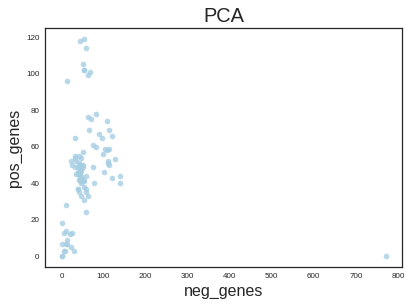

In [30]:
pca_weights.count_high_weight_genes(return_plot=True, title='PCA',
                                    color=algorithm_color_dict['PCA'],
                                    method='dynamic');

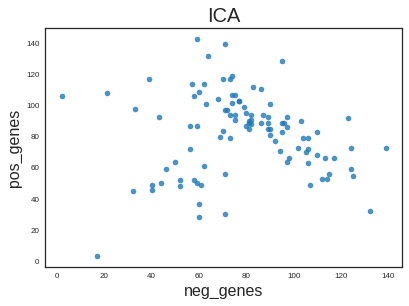

In [31]:
ica_weights.count_high_weight_genes(return_plot=True, title='ICA',
                                    color=algorithm_color_dict['ICA'],
                                    method='dynamic');

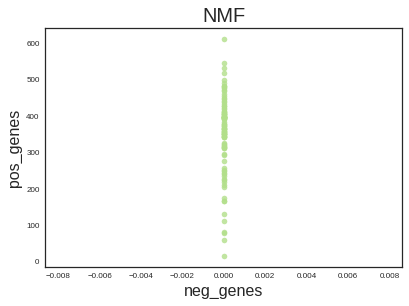

In [32]:
nmf_weights.count_high_weight_genes(return_plot=True, title='NMF',
                                    color=algorithm_color_dict['NMF'],
                                    method='dynamic');

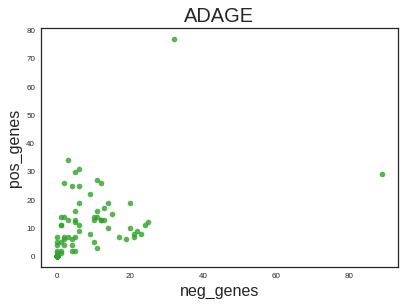

In [33]:
adage_weights.count_high_weight_genes(return_plot=True, title='ADAGE',
                                      color=algorithm_color_dict['ADAGE'],
                                      method='dynamic');

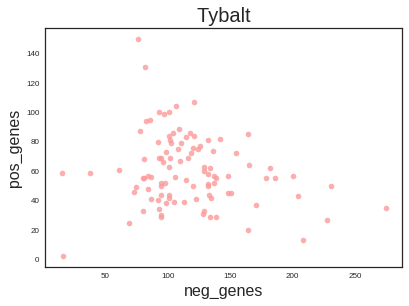

In [34]:
tybalt_weights.count_high_weight_genes(return_plot=True, title='Tybalt',
                                       color=algorithm_color_dict['Tybalt'],
                                       method='dynamic');

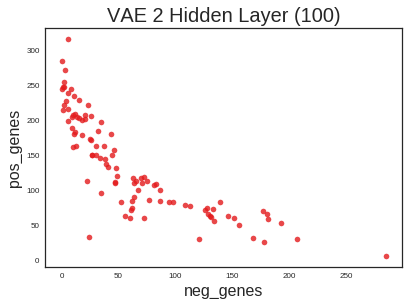

In [35]:
vae_2l100_weights.count_high_weight_genes(return_plot=True,
                                          title='VAE 2 Hidden Layer (100)',
                                          color=algorithm_color_dict['VAE_100'],
                                          method='dynamic');

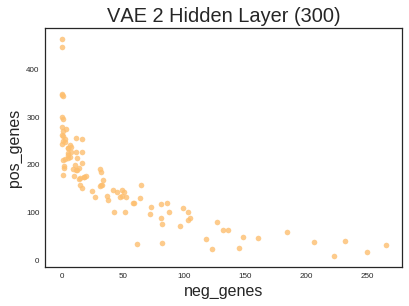

In [36]:
vae_2l300_weights.count_high_weight_genes(return_plot=True,
                                          title='VAE 2 Hidden Layer (300)',
                                          color=algorithm_color_dict['VAE_300'],
                                          method='dynamic');